In [79]:
!pip install delphi-epidata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.0 MB/s eta 0:00:00


In [80]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from datetime import datetime
%matplotlib inline
from delphi_epidata import Epidata

In [78]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

##Data from DELPHI APIs:

In [6]:
# flusurv API
# Make the API request
response = Epidata.flusurv(['CA'], [Epidata.range(199740, 202323)])

# Check if the request was successful
if response['result'] == 1:
    # Extract the data from the response
    data = response['epidata']
    
    # Convert the data to a DataFrame
    df_flusurv = pd.DataFrame(data)
    print('Load Successfully')
    
else:
    # Handle request error
    print('Error occurred while fetching the data')

Load Successfully


In [7]:
df_flusurv

,release_date,location,issue,epiweek,lag,rate_age_0,rate_age_1,rate_age_2,rate_age_3,rate_age_4,rate_overall
0,2017-02-07,CA,201704,200340,695,0.0,0.0,NaN,NaN,NaN,0.0
1,2017-02-07,CA,201704,200341,694,0.0,0.0,NaN,NaN,NaN,0.0
2,2017-02-07,CA,201704,200342,693,0.0,0.0,NaN,NaN,NaN,0.0
3,2017-02-07,CA,201704,200343,692,0.0,0.0,NaN,NaN,NaN,0.0
4,2017-02-07,CA,201704,200344,691,0.0,0.6,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...
513,2021-05-28,CA,202111,202013,51,0.0,0.0,0.0,0.3,0.2,0.1
514,2021-05-28,CA,202111,202014,50,0.0,0.0,0.2,0.0,0.2,0.1
515,2021-05-28,CA,202111,202015,49,0.0,0.0,0.0,0.0,0.0,0.0
516,2021-05-28,CA,202111,202016,48,0.0,0.0,0.1,0.1,0.2,0.1


In [8]:
# nowcast APIs
# Make the API request
response = Epidata.nowcast(['nat'], [Epidata.range(199740, 202323)])

# Check if the request was successful
if response['result'] == 1:
    # Extract the data from the response
    data = response['epidata']
    
    # Convert the data to a DataFrame
    df_nowcast = pd.DataFrame(data)
    print('Load Successfully')
    
else:
    # Handle request error
    print('Error occurred while fetching the data')

Load Successfully


In [9]:
df_nowcast

,location,epiweek,value,std
0,nat,201045,1.34184,0.014319
1,nat,201046,1.58032,0.015421
2,nat,201047,1.69599,0.015156
3,nat,201048,1.91439,0.041578
4,nat,201049,1.80838,0.047425
...,...,...,...,...
613,nat,202232,1.25660,0.207681
614,nat,202233,1.24926,0.207602
615,nat,202234,1.41563,0.209089
616,nat,202235,1.75752,0.209436


In [12]:
# wiki API
# Make the API request
response = Epidata.wiki(['influenza'], None, [Epidata.range(199740, 202252)], [0, 12])

# Check if the request was successful
if response['result'] == 1:
    # Extract the data from the response
    data = response['epidata']
    
    # Convert the data to a DataFrame
    df_wiki = pd.DataFrame(data)
    print('Load Successfully')
    
else:
    # Handle request error
    print('Error occurred while fetching the data')

Load Successfully


In [13]:
df_wiki

,article,count,total,hour,epiweek,value
0,influenza,1084,45299920,0,200750,23.929402
1,influenza,617,25317232,12,200750,24.370753
2,influenza,1063,46788274,0,200751,22.719368
3,influenza,617,26614101,12,200751,23.183199
4,influenza,612,40381856,0,200752,15.155321
...,...,...,...,...,...,...
1381,influenza,327,25315960,12,202109,12.916753
1382,influenza,294,28785972,0,202110,10.213308
1383,influenza,339,25210501,12,202110,13.446778
1384,influenza,230,25090869,0,202111,9.166681


##Data from ILINet 

(https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html)

In [3]:
data = pd.read_csv('ILINet.csv')

In [4]:
data

,REGION TYPE,REGION,YEAR,WEEK,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,National,X,1997,40,1.10148,1.21686,179,X,157,205,X,29,570,192,46842
1,National,X,1997,41,1.20007,1.28064,199,X,151,242,X,23,615,191,48023
2,National,X,1997,42,1.37876,1.23906,228,X,153,266,X,34,681,219,54961
3,National,X,1997,43,1.19920,1.14473,188,X,193,236,X,36,653,213,57044
4,National,X,1997,44,1.65618,1.26112,217,X,162,280,X,41,700,213,55506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,National,X,2023,17,1.96127,1.98343,10051,11200,X,15803,4138,3663,44855,3651,2261489
1335,National,X,2023,18,2.00416,2.03233,10028,11232,X,16105,4275,3955,45595,3616,2243485
1336,National,X,2023,19,1.96709,2.01070,10203,11062,X,16718,4075,3732,45790,3608,2277311
1337,National,X,2023,20,1.94940,1.98404,9727,10692,X,15490,3877,3454,43240,3580,2179393


In [5]:
data['INDEX'] = data['YEAR'].astype(str) + '-' + data['WEEK'].astype(str)
new_df = data[['INDEX', '% WEIGHTED ILI']]

In [6]:
new_df.set_index("INDEX",inplace=True)
new_df

,% WEIGHTED ILI
INDEX,
1997-40,1.10148
1997-41,1.20007
1997-42,1.37876
1997-43,1.19920
1997-44,1.65618
...,...
2023-17,1.96127
2023-18,2.00416
2023-19,1.96709


In [7]:
new_df.isna().sum()

% WEIGHTED ILI    0
dtype: int64

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 

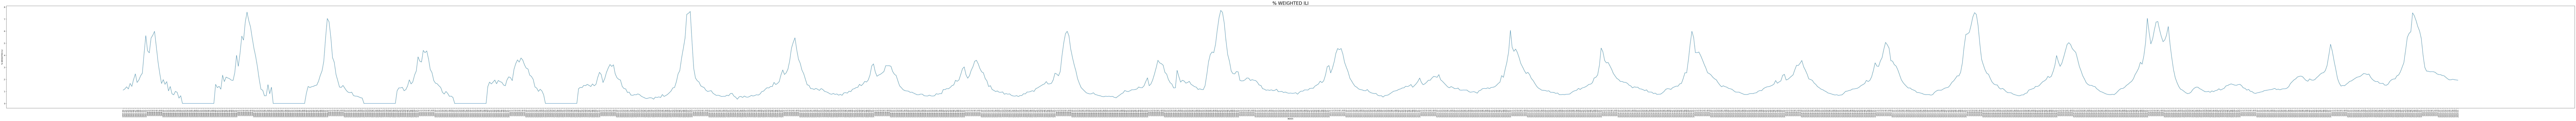

In [24]:
for col in new_df.columns:
    plt.figure(figsize=(250,10))
    sns.lineplot(x = new_df.index ,y = new_df[col],data = new_df)
    plt.xticks(rotation=90)
    plt.title(col , fontsize=24)
    plt.show()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

##Correlation Plots:

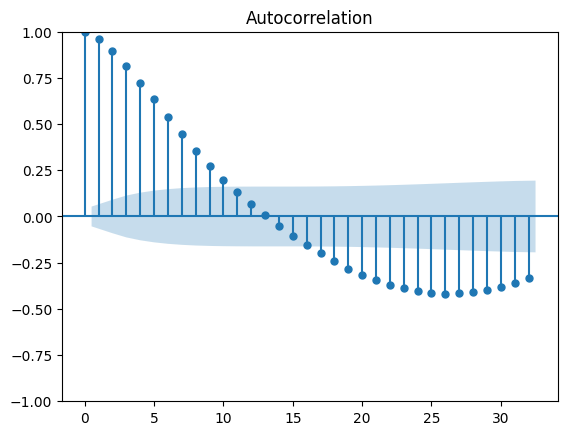

In [13]:
acf = plot_acf(new_df['% WEIGHTED ILI'])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


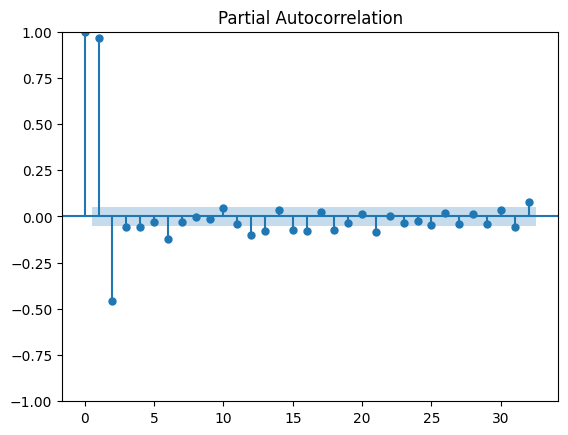

In [14]:
pacf = plot_pacf(new_df['% WEIGHTED ILI'])

In [83]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(250,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.xticks(rotation=90)
    plt.show()

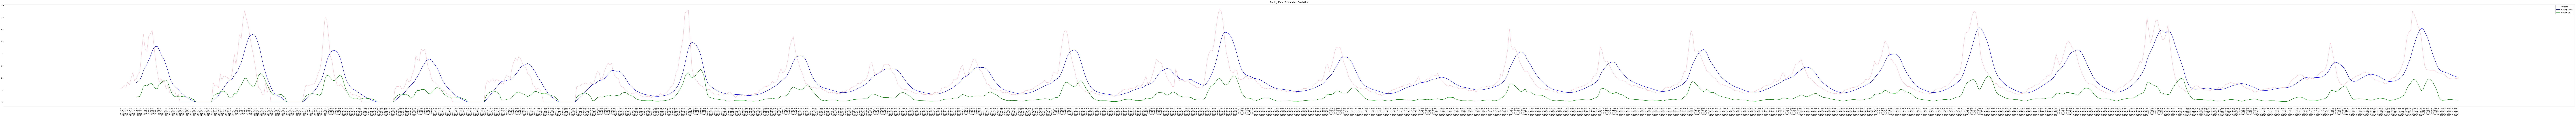

In [84]:
test_stationarity(new_df['% WEIGHTED ILI'])

In [81]:
train_data = new_df[:'2021-30']
train_data.drop(train_data.index[-1], inplace=True)
test_data = new_df['2021-30': ]

In [29]:
import statsmodels.api as sm

## ARMA Model for predicting next week forecast:



In [93]:
prediction_rolling = pd.Series()
for end_date in test_data.index:
    train_data = new_df[:end_date]
    train_data.drop(train_data.index[-1], inplace=True)
    model = sm.tsa.ARIMA(train_data, order=(2,0,1))
    model_fit = model.fit()
    pred = model_fit.forecast().values
    prediction_rolling.loc[end_date] = pred[0]

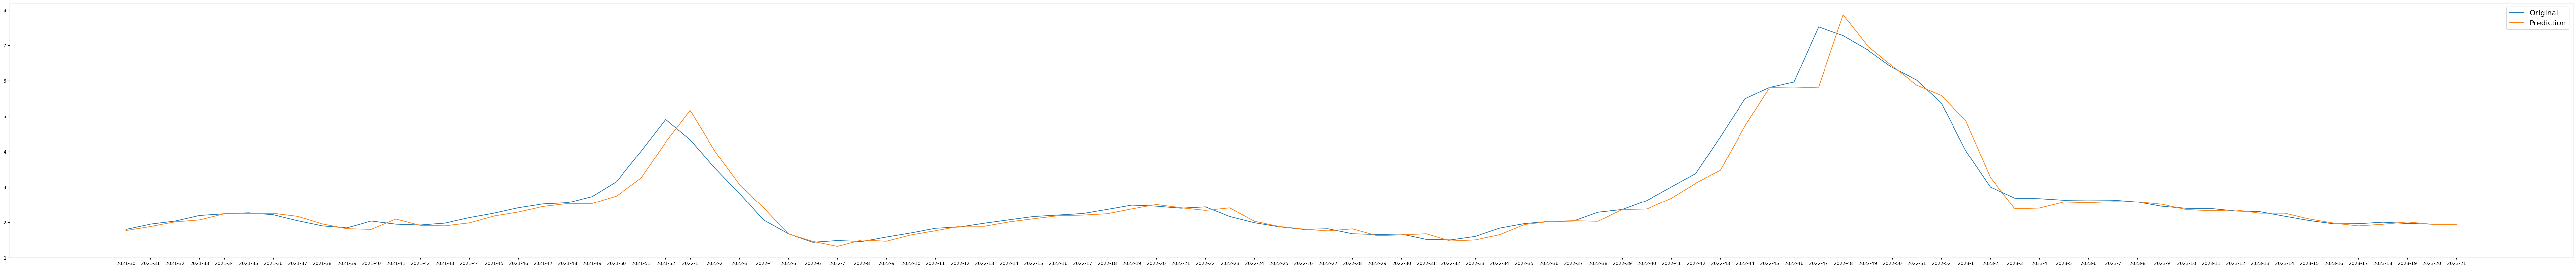

In [94]:
plt.figure(figsize=(100,10))
plt.plot(test_data)
plt.plot(pd.DataFrame(prediction_rolling))
plt.legend(('Original', 'Prediction'), fontsize = 16)

##ARMA Model for predicting next 4 week forecast:

In [ ]:
prediction_rolling = pd.Series()
for end_date in test_data.index:
    train_data = new_df[:end_date]
    train_data.drop(train_data.index[-1], inplace=True)
    model = sm.tsa.ARIMA(train_data, order=(2,0,1))
    model_fit = model.fit()
    pred = model_fit.forecast(steps = 4).values
    prediction_rolling.loc[end_date] = pred[0]